In [7]:
import subprocess, msprime, pyslim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
os.getcwd()

'/Users/jeff/workspace/selection-against-introgression/simulations/code'

In [8]:
# run simulation
#subprocess.check_output(["slim", "-m", "-s", "0", "code/intra-chrom.slim"])
# Load the .trees file
ts = pyslim.load("/Users/jeff/workspace/selection-against-introgression/simulations/results/single-sweep/replicate1_gen0005.trees").simplify()

/Users/jeff/.local/lib/python3.8/site-packages/pyslim-0.403-py3.8.egg/pyslim/slim_tree_sequence.py:780: UserWarning: This is an version 0.4 SLiM tree sequence. When you write this out, it will be converted to version 0.5.
  warnings.warn("This is an version {} SLiM tree sequence.".format(file_version) +


In [9]:
print("Tree sequence has {} trees".format(ts.num_trees))
print("Tree sequence has {} nodes".format(ts.num_nodes))
print("Tree sequence spans {} positions".format(ts.sequence_length))
print("Tree sequence has {} samples".format(ts.num_samples))
print("Tree sequence has {} individuals".format(ts.num_individuals))
print("Tree sequence has {} sites".format(ts.num_sites))


Tree sequence has 1024 trees
Tree sequence has 65061 nodes
Tree sequence spans 1024.0 positions
Tree sequence has 20000 samples
Tree sequence has 12756 individuals
Tree sequence has 1024 sites


In [5]:
["gen" + num for num in ["0001","0002","0003","0004","0005","0010","0050","0100","0250","0500","0750","1000"]]

['gen0001',
 'gen0002',
 'gen0003',
 'gen0004',
 'gen0005',
 'gen0010',
 'gen0050',
 'gen0100',
 'gen0250',
 'gen0500',
 'gen0750',
 'gen1000']

In [17]:
G = ts.genotype_matrix(isolated_as_missing=False)
np.mean(G[1,:])
#G[-10:,-10:]
#np.mean(np.absolute(G[1,:]))
#np.mean(np.abs(G[1, :100]))

0.391

In [20]:
ssets = [ts.samples(p) for p in range(ts.num_populations)]
sset=[ssets[0]]


In [16]:
def allele_frequencies(ts, sample_sets=None):
    if sample_sets is None:
       sample_sets = [ts.samples()] 
    n = np.array([len(x) for x in sample_sets])
    def f(x):
       return x / n
    return ts.sample_count_stat(sample_sets, f, len(sample_sets), windows='sites', polarised=True, mode='site', strict=False, span_normalise = True)


In [21]:
val = allele_frequencies(ts, sample_sets=sset).tolist()
val
val = [item for sublist in val for item in sublist]
pos = [s.position for s in ts.sites()]
pos = [int(i) for i in pos]
freq = [0]*int(ts.sequence_length)

for i in range(0,len(pos)):
    freq[pos[i]]=val[i]
    
np.mean(freq)

#print("file", *freq)

0.165526904296875

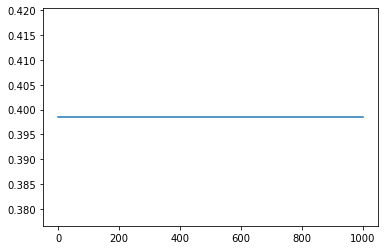

In [10]:
plt.plot(np.arange(0,1000).tolist(), freq)
    

In [13]:
breaks = np.zeros(ts.num_trees + 1)
ancestry = np.zeros(ts.num_trees + 1)
ancestry_all_seq = np.zeros(int(ts.sequence_length))
for tree in ts.trees(sample_counts=True):
    subpop_sum, subpop_weights = 0, 0
    for root in tree.roots:
        leaves_count = tree.num_samples(root) - 1 # the root is a sample 
        
        subpop_sum += tree.population(root) * leaves_count 
        # for population 0, this will be 0. for population 1, it will sum the number of individuals descended from that population. 
        
        subpop_weights += leaves_count
    breaks[tree.index] = tree.interval[0]
    ancestry[tree.index] = subpop_sum / subpop_weights
    
    ancestry_all_seq[ list(range (int(tree.interval[0]), int(tree.interval[1]) ))  ] = subpop_sum / subpop_weights
    
breaks[-1] = ts.sequence_length
ancestry[-1] = ancestry[-2]
     # Make a simple plot
print(ancestry_all_seq)
#plt.plot(np.arange(0,1024).tolist(), ancestry_all_seq)



/Users/jeff/opt/anaconda3/lib/python3.8/site-packages/tskit/trees.py:668: RuntimeWarning: The sample_counts option is not supported since 0.2.4 and is ignored
  warnings.warn(


[0.44859507 0.44855529 0.44863714 ... 0.44633001 0.44637562 0.44640356]


In [ ]:
np.savetxt("../results/ancestry-500.csv", ancestry_all_seq, delimiter = ",")

In [ ]:
tree1 = ts.at(0)
tree2 = ts.at(1)
tree1.interval
start = list(tree2.interval)[0]
stop = list(tree2.interval)[1]
list([start, stop])

In [ ]:
len(breaks)
len(ancestry)

In [ ]:
tree1 = ts.at(900)

In [ ]:
ts.num_trees


In [ ]:
tree1.interval

In [ ]:
for root in tree1.roots:
    pops.append(tree1.population(root))

In [ ]:
root1 = tree1.roots[1]
leaves_count = tree1.num_samples(root1)
leaves_count

In [ ]:
leaves_count = tree1.num_samples(root1)
tree1.population(root1) * leaves_count

In [ ]:
for root in tree1.roots:
    print(tree1.population(root))

In [ ]:
tree1.num_samples(root1)
tree1.population(root1)

In [ ]:
list(range(0,100))